## Advanced Lane Lines Detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

%matplotlib inline

### Camera Calibration

[[234 235 199 ..., 115 129 153]
 [233 188 150 ..., 196 157 109]
 [201 146 194 ..., 226 213 170]
 ..., 
 [ 20 139 205 ..., 204 200 206]
 [ 17  91 205 ..., 196 202 202]
 [ 22  14 118 ..., 199 200 115]]


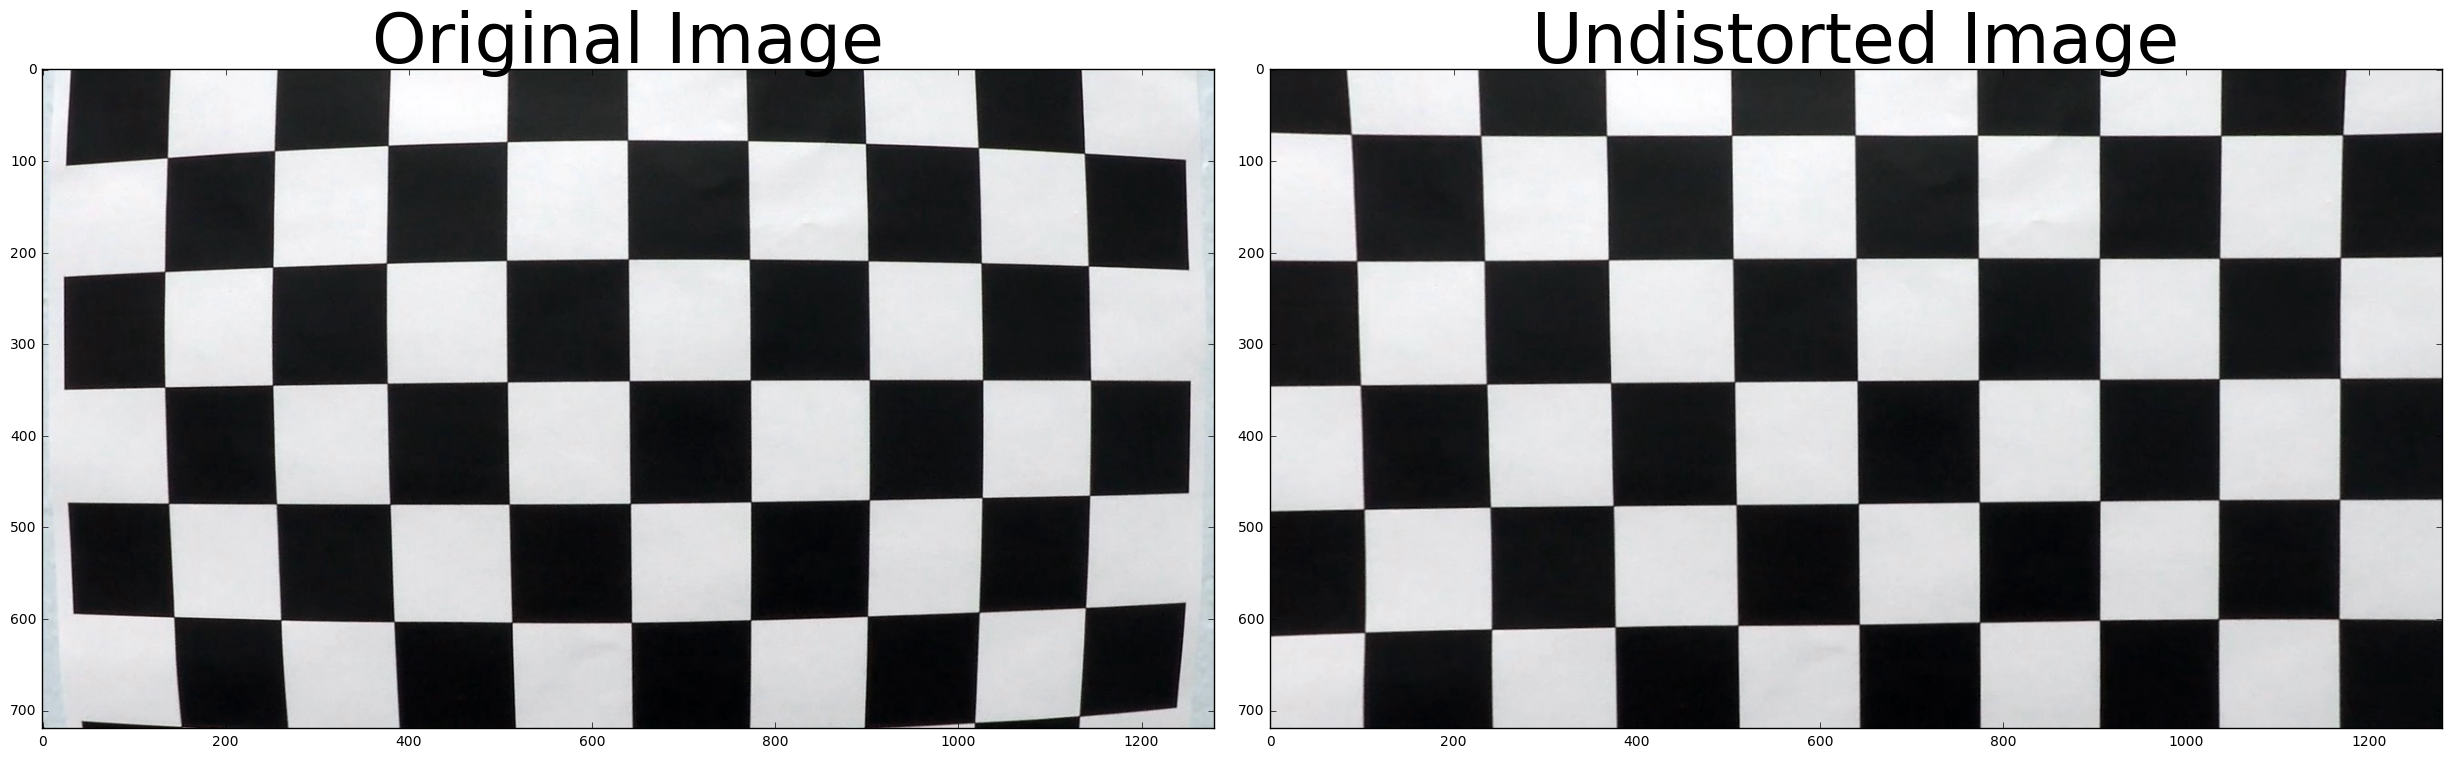

In [2]:
# prepare object points
nx = 9#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

#Read in and make a list of calibration images
calib_images = glob.glob('./camera_cal/calibration*.jpg')#images in test

def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    print(gray)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

#Arrays to store object points and image points

objpoints = [] #3D points in real world space
imgpoints = [] #2D points in image space
x = 0
noncalib_images = []

#Prepare object points like (0,0,0), (1,0,0), (2,0,0).........(8,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) #x, y coordinates



for fname in calib_images:
    #read in each image
    img = cv2.imread(fname)
    #convert image to grayscale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    #if corners are found , add object poins, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        x = x + 1
        #draw and display the corners
        #img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        #plt.imshow(img)

output1 = open('imgpoints_123.pkl', 'wb')
pickle.dump(imgpoints, output1)
output1.close()
output2 = open('objpoints_123.pkl', 'wb')
pickle.dump(objpoints, output2)
output2.close()
with open('save_objpoints.p', 'wb') as handle:
    pickle.dump(objpoints, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
IMG = cv2.imread('camera_cal/calibration1.jpg')
undistorted = cal_undistort(IMG, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(IMG)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


-0-0-0-0-0
(720, 1280)
1940.75536276 2221.31050797
1786.90234572 m 1212.74352425 m
good
--------------->>><<<<-------
-0.2537142857142857
2764800


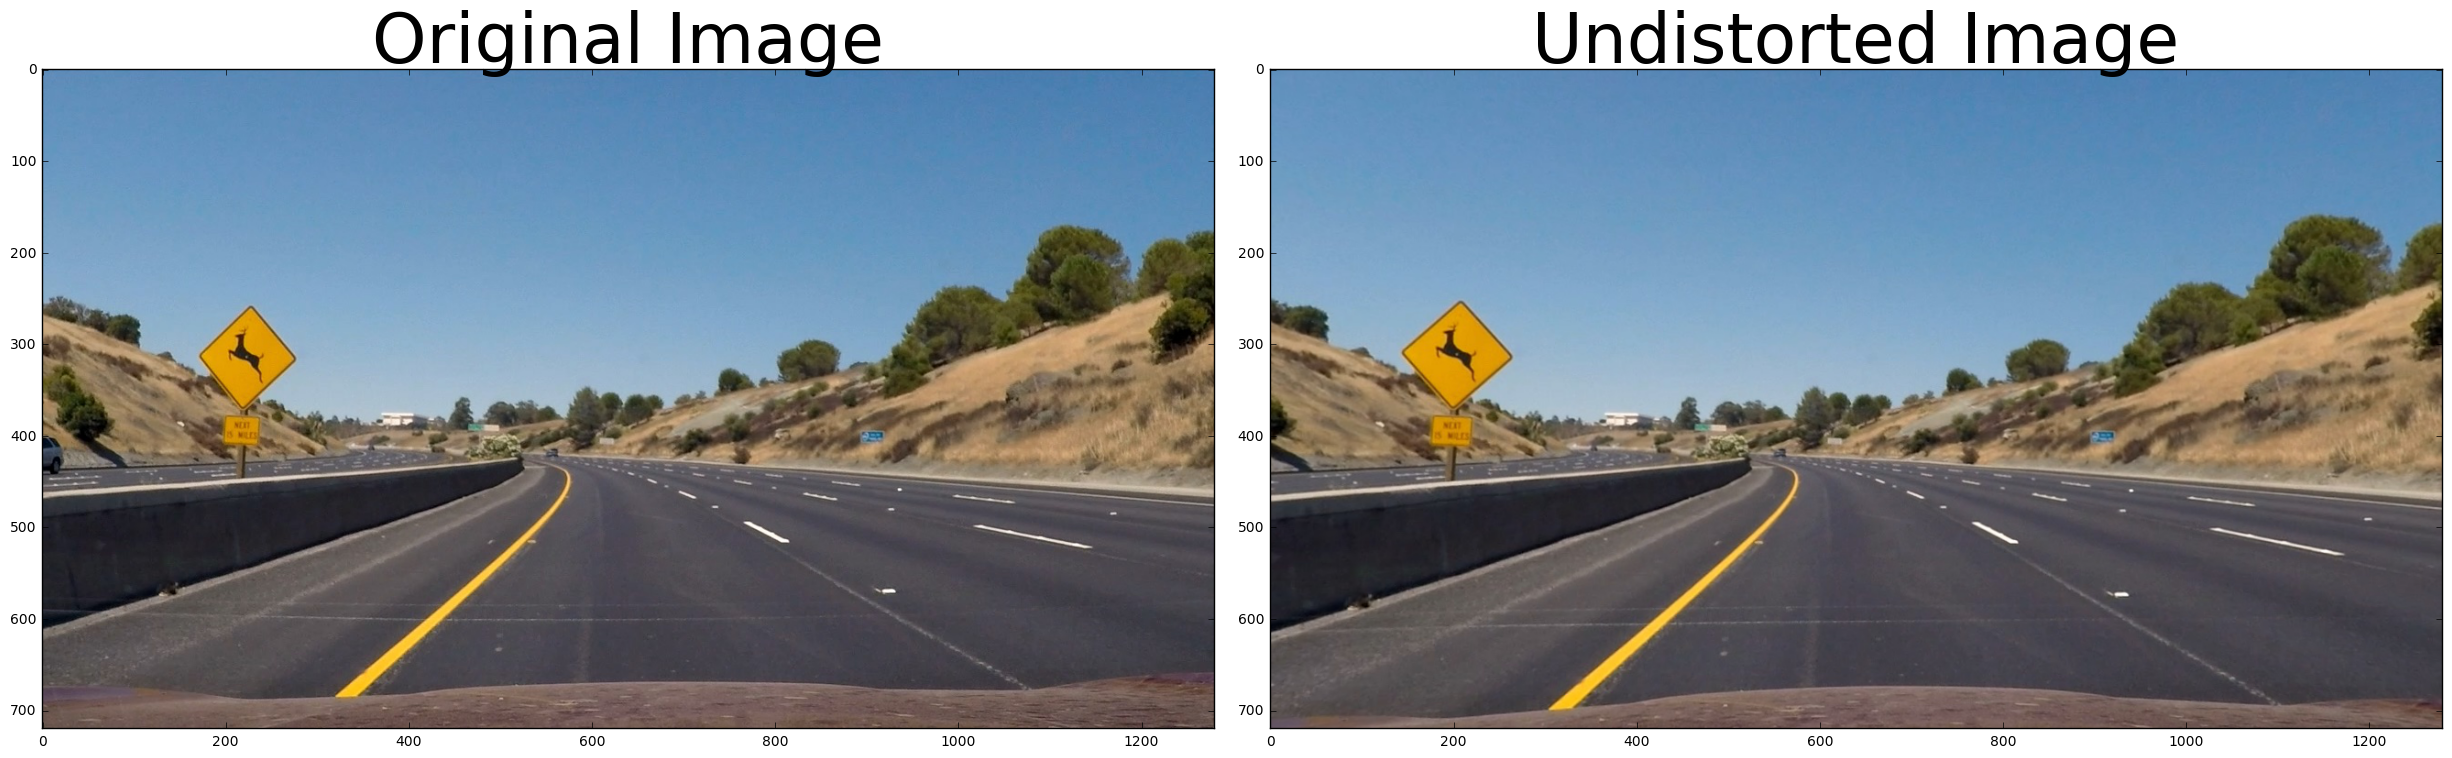

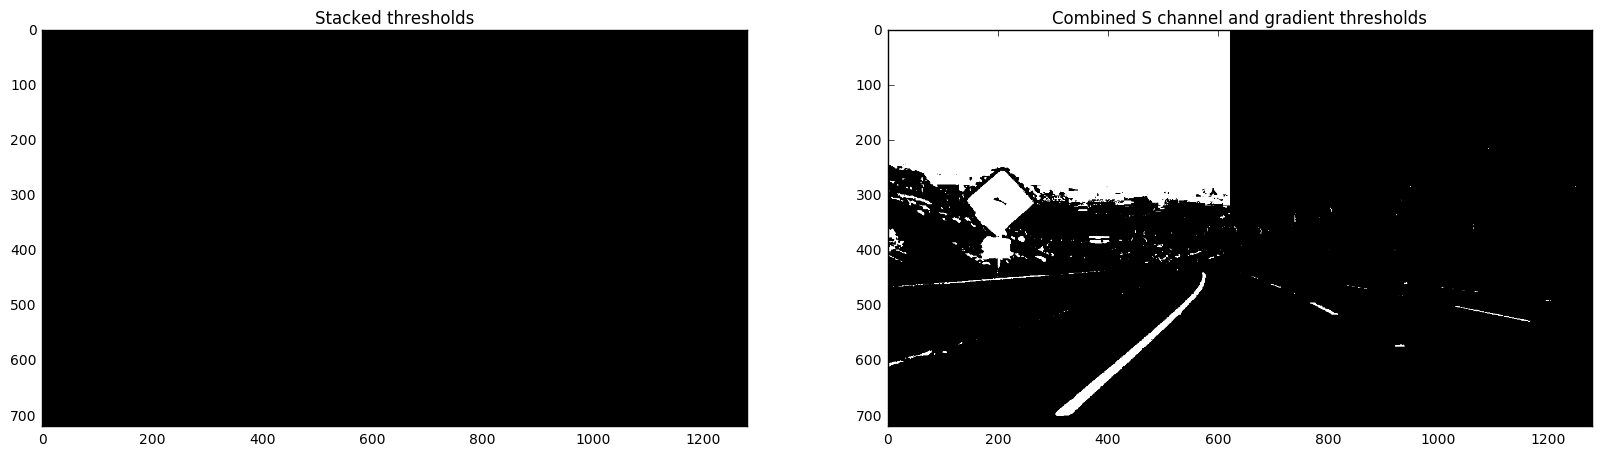

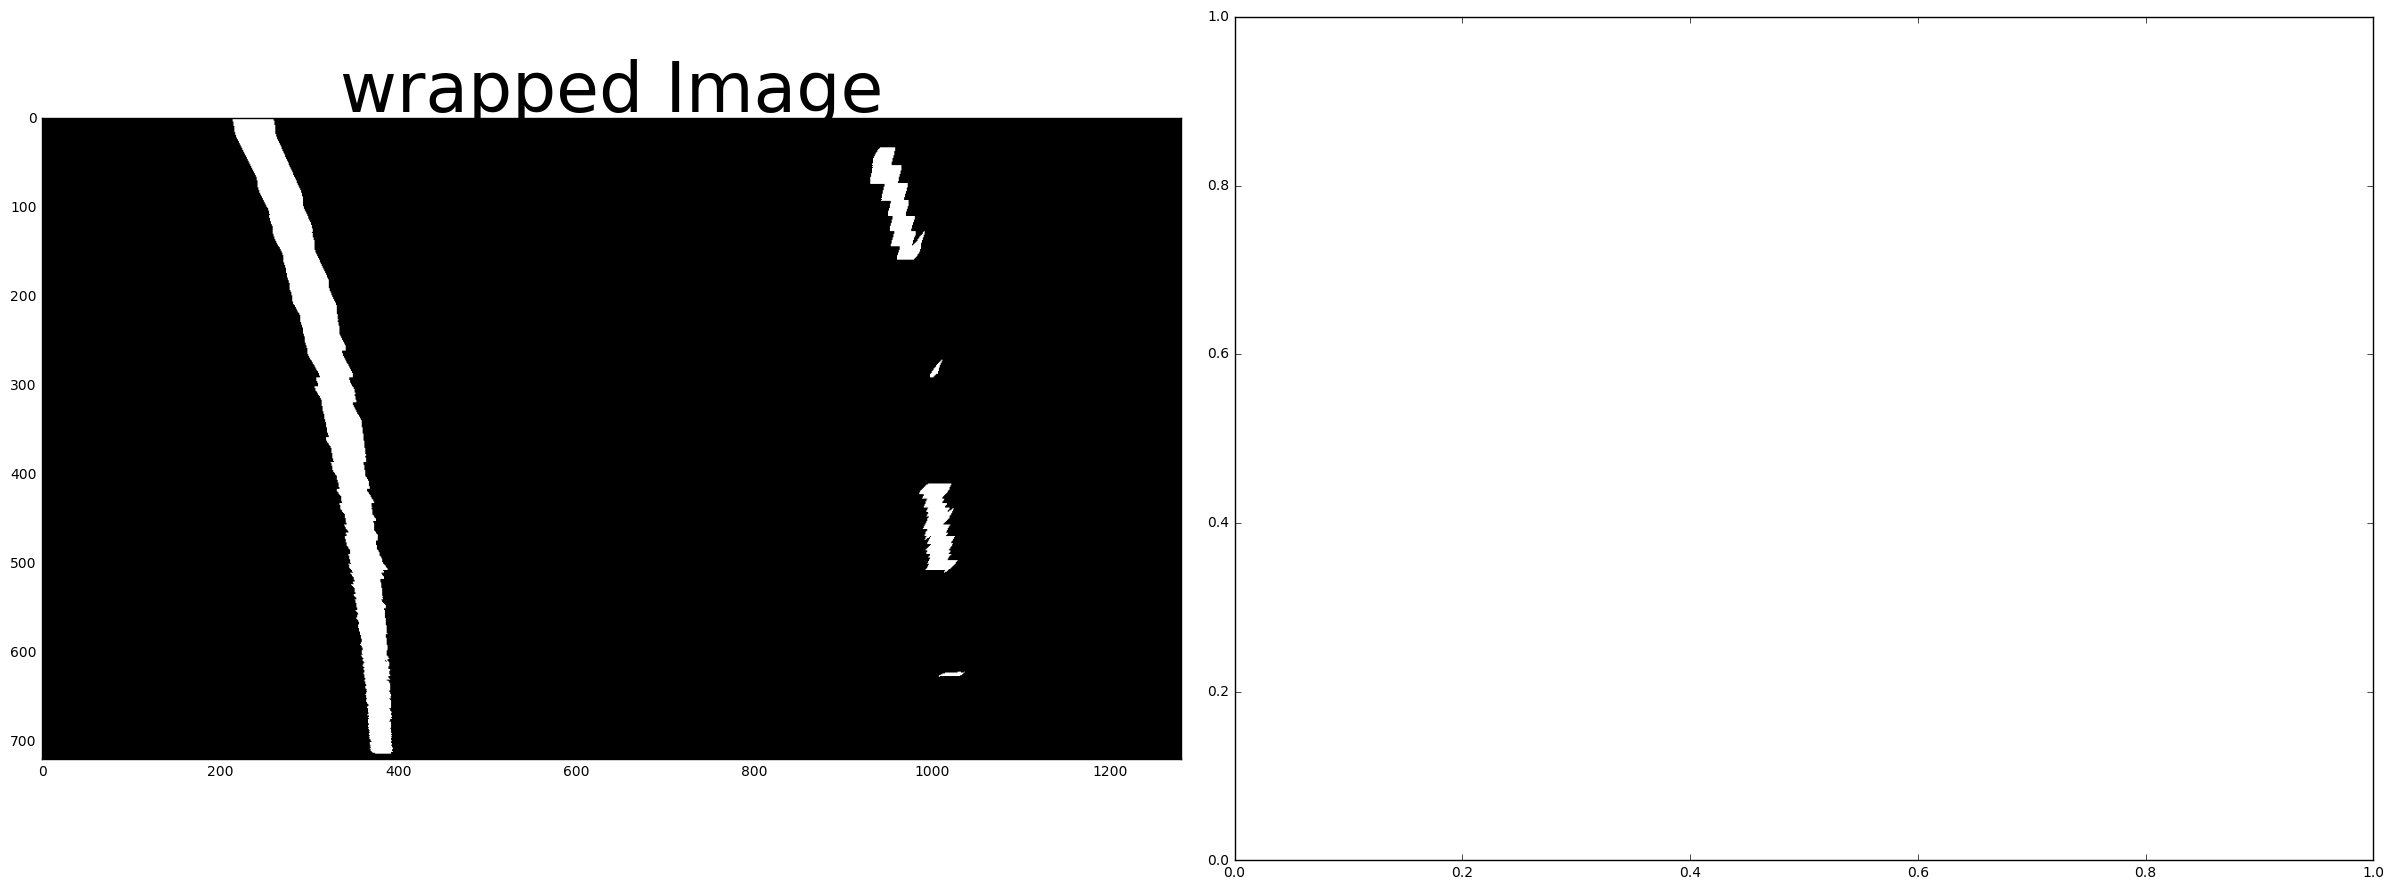

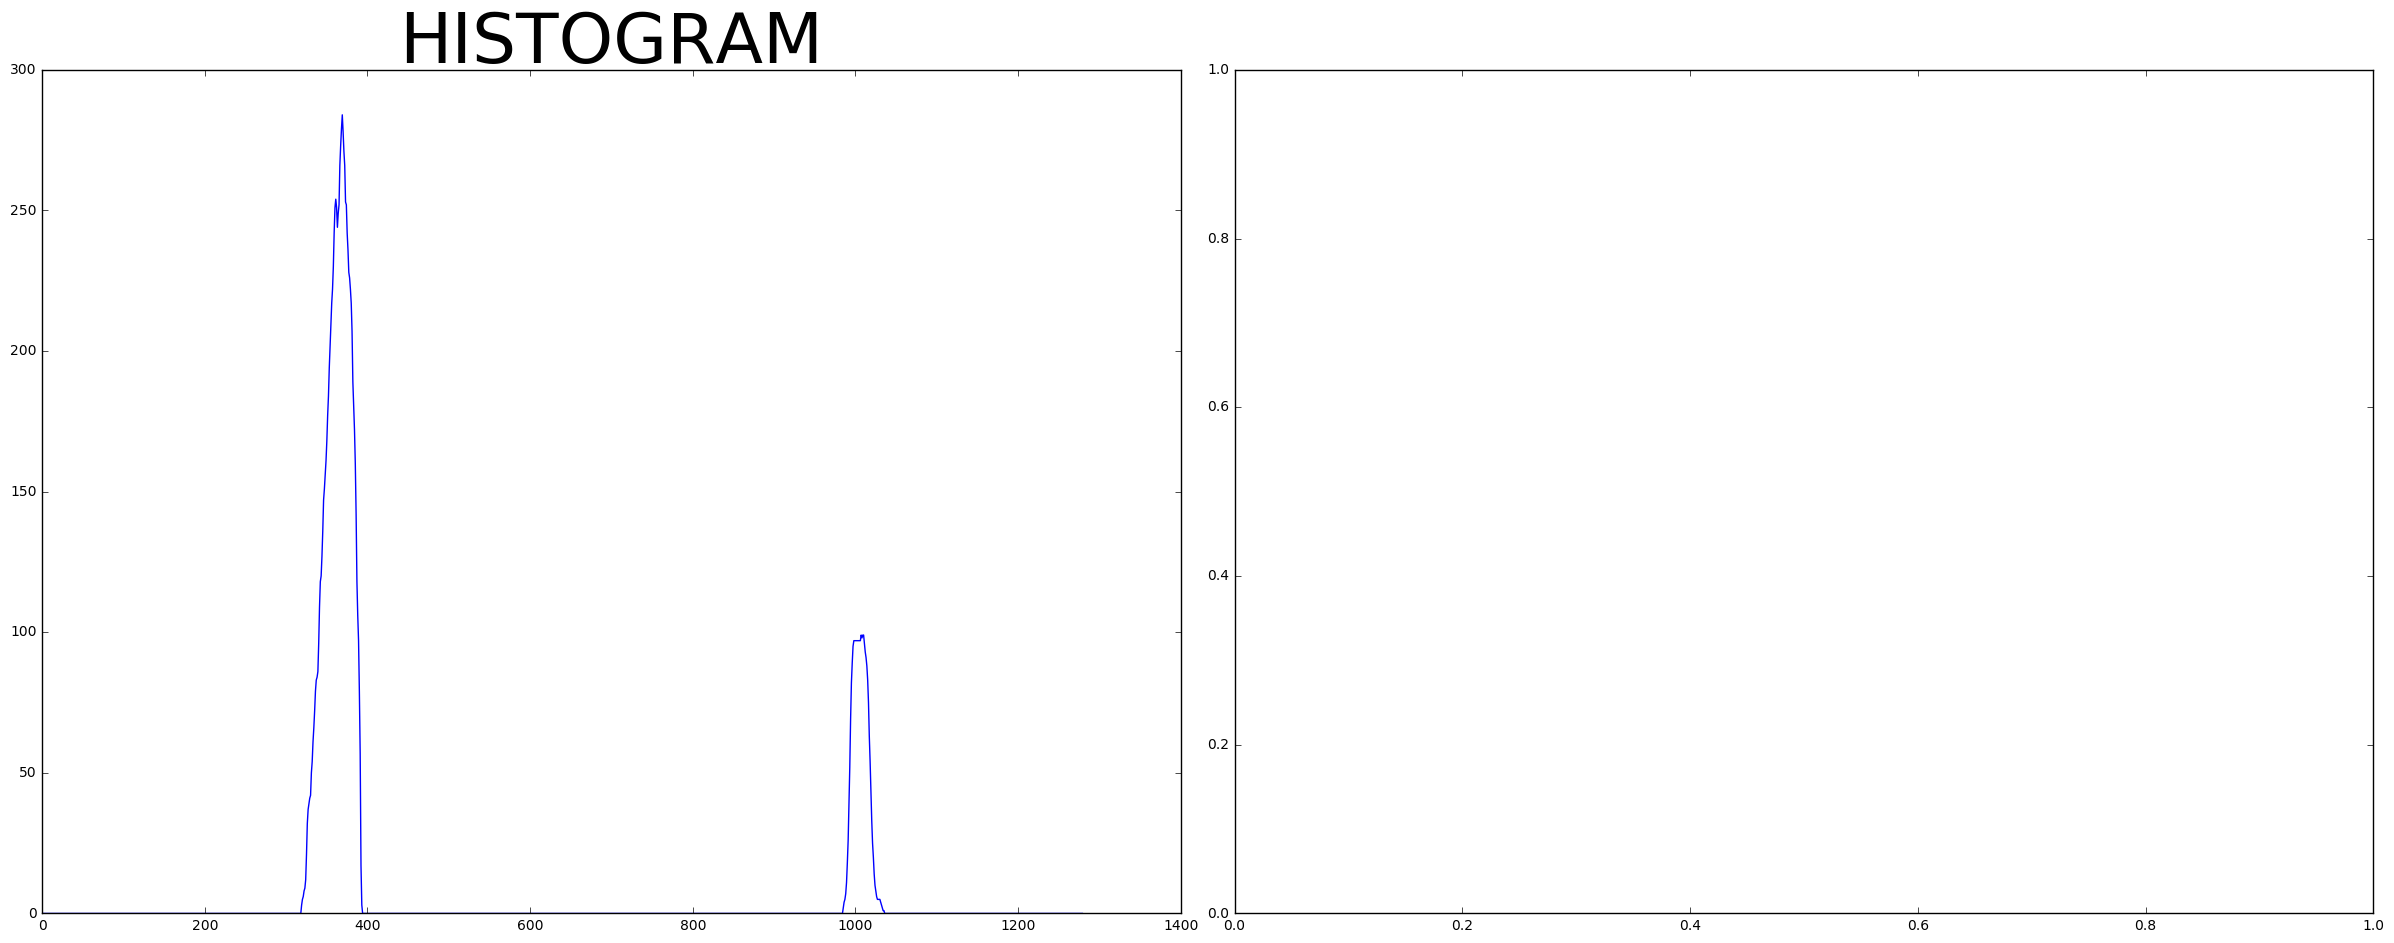

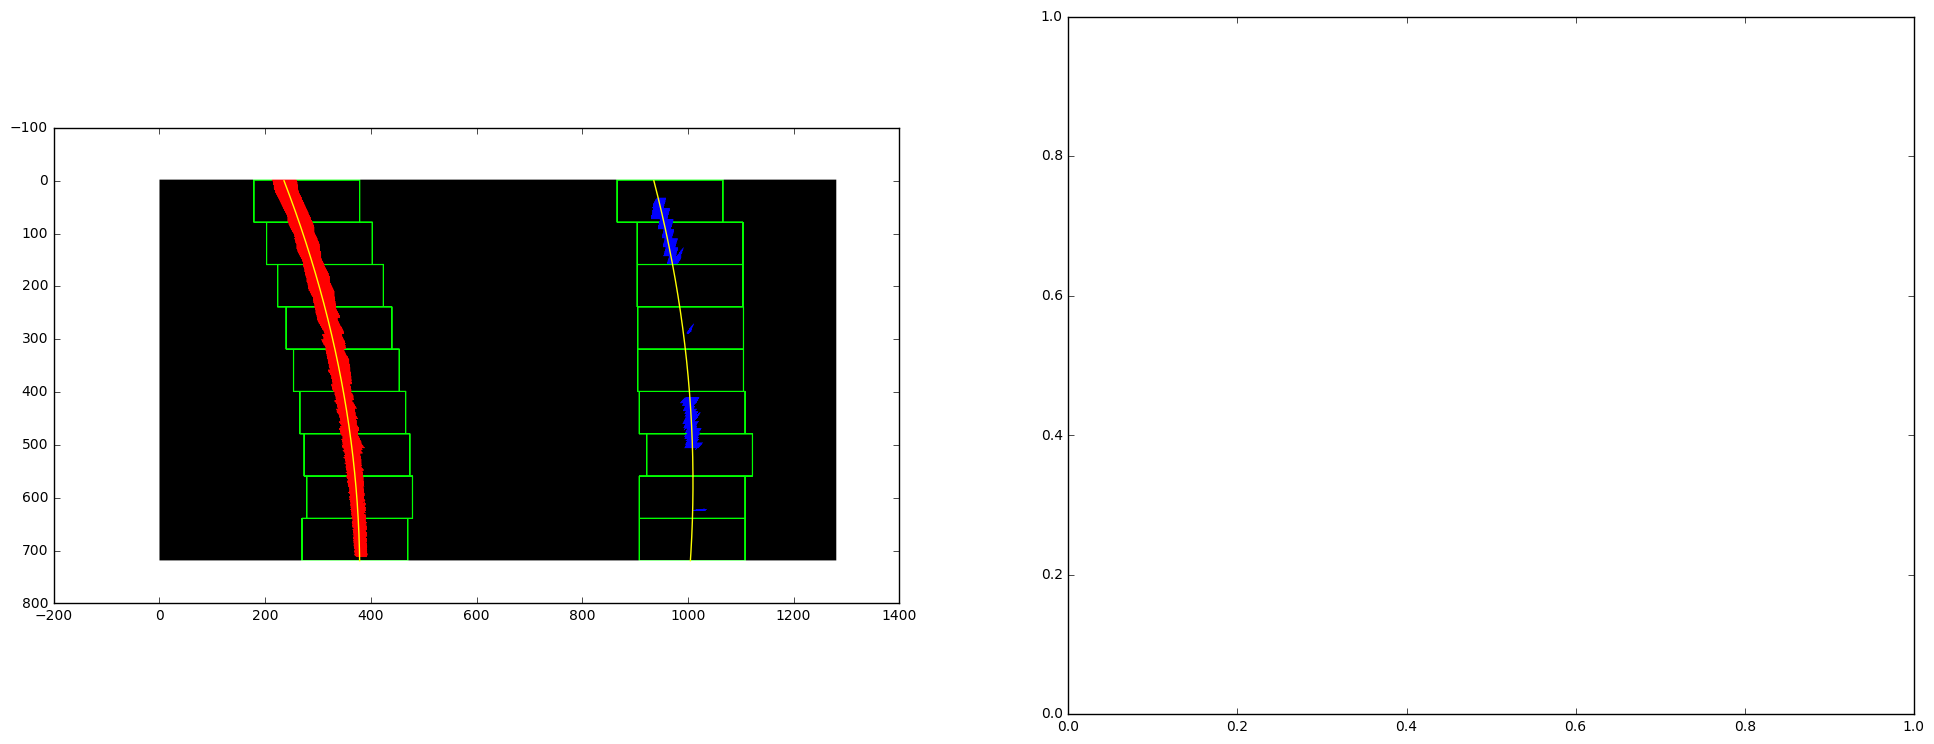

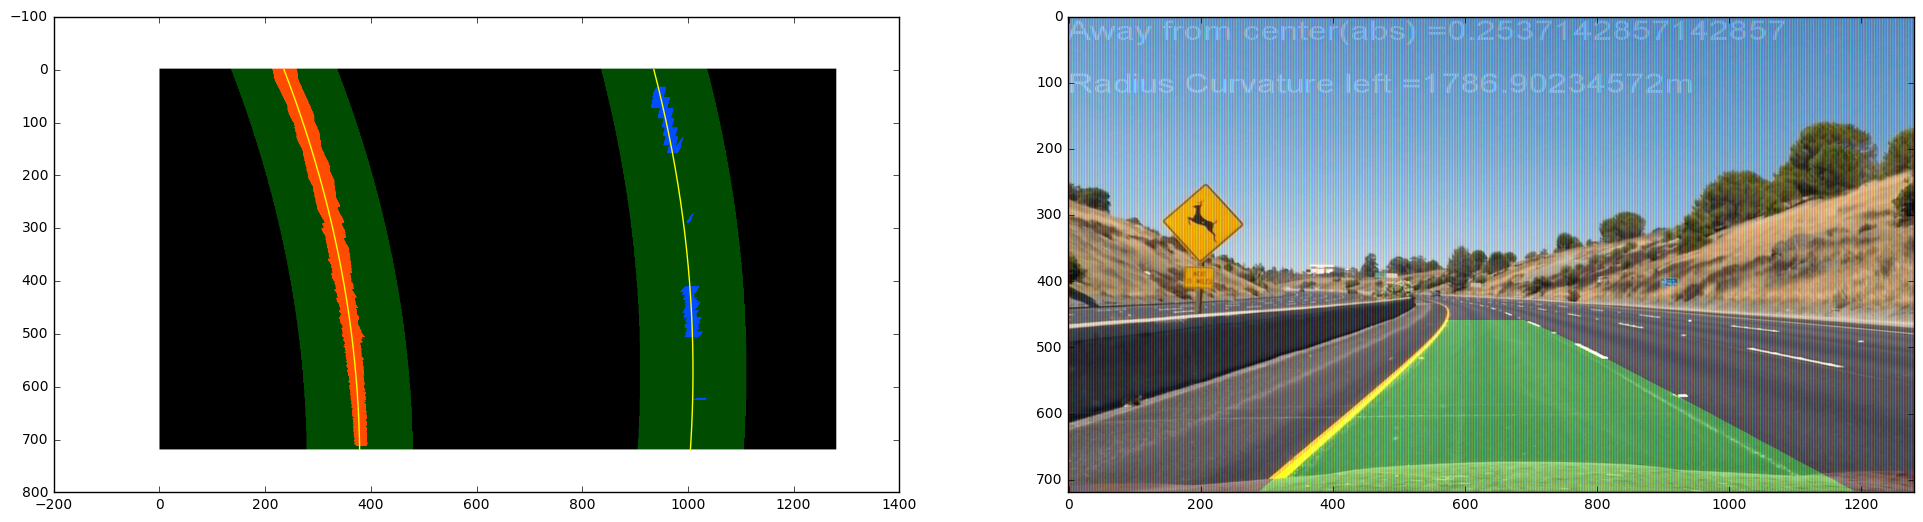

In [3]:
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #print(gray)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

calib_images =glob.glob('camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []
c= 0
objp = np.zeros((6*9,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

for fname in calib_images:
    #read in each image
    img = cv2.imread(fname)
    #convert image to grayscale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    #if corners are found , add object poins, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        x = x + 1
        #draw and display the corners
        #img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        #plt.imshow(img)
        
IMG = mpimg.imread('test_images/test2.jpg')
undistorted = cal_undistort(IMG, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(IMG)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#
hls = cv2.cvtColor(undistorted, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]
l_channel = hls[:,:,1]
h_channel = hls[:,:,0]
print('-0-0-0-0-0')
print(s_channel.shape)

for i in range(s_channel.shape[0]-1):
    for j in range(s_channel.shape[1]-1):
        if( j > 620):
            s_channel[i][j] = 0
            

gray = cv2.cvtColor(undistorted, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 120
thresh_max = 255
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1) # Take the derivative in x
abs_sobely = np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))

# Threshold x gradient
thresh_min = 120
thresh_max = 255
sybinary = np.zeros_like(scaled_sobely)
sybinary[(scaled_sobely >= thresh_min) & (scaled_sobely <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 90
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1



h_thresh_min = 15
h_thresh_max = 100
h_binary = np.zeros_like(s_channel)
h_binary[(h_channel >= h_thresh_min) & (h_channel <= h_thresh_max)] = 1


l_thresh_min = 200
l_thresh_max = 255
l_binary = np.zeros_like(s_channel)
l_binary[(l_channel >= l_thresh_min) & (l_channel <= l_thresh_max)] = 1


# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[((l_binary == 1) |(s_binary == 1)  | (sxbinary== 1))  ] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')


src = np.float32([[585, 460], [203, 720], [695, 460],[1127, 720]])
dst = np.float32([[320, 0], [320, 720], [960, 0], [960, 720]])

M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
binary_warped = cv2.warpPerspective(combined_binary, M,(combined_binary.shape[1],combined_binary.shape[0]) , flags=cv2.INTER_LINEAR)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(binary_warped,cmap='gray')
ax1.set_title('wrapped Image', fontsize=50)  


histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.plot(histogram)
ax1.set_title('HISTOGRAM', fontsize=50)  

out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 


# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(out_img)
ax1.plot(left_fitx, ploty, color='yellow')
ax1.plot(right_fitx, ploty, color='yellow')
#ax1.xlim(0, 1280)
#ax1.ylim(720, 0)

# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(result)
ax1.plot(left_fitx, ploty, color='yellow')
ax1.plot(right_fitx, ploty, color='yellow')
#plt.xlim(0, 1280)
#plt.ylim(720, 0)
#-----------

# Generate some fake data to represent lane-line pixels
#ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
#leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                        #      for y in ploty])
#rightx = np.array([1000 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                        #        for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y




y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m
if(left_curverad >100):
    print('good')

warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    
# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (IMG.shape[1], IMG.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
plt.imshow(result)

mid_point = result.shape[1]/2
left_x_point = leftx_base
right_x_point = rightx_base
screen_off_center = mid_point - (int(left_x_point + right_x_point)/2)
meters_off_center = xm_per_pix * screen_off_center
print("--------------->>><<<<-------")
print(meters_off_center)

import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
font = ImageFont.truetype("arial.ttf",40)
img=Image.new("RGBA", (1280,720),(0,0,0))
draw = ImageDraw.Draw(img)
draw.text((0, 0),"Away from center(abs) ="+str(abs(meters_off_center)),(255,255,0), font = font)
draw.text((0, 80),"Radius Curvature left ="+str(left_curverad)+"m",(255,255,0), font = font)
draw.text((0, 160),"Radius Curvature right ="+str(right_curverad)+"m",(0,0,0), font = font)
draw = ImageDraw.Draw(img)
draw = ImageDraw.Draw(img)
img.save("a_test.png")
plt.imshow(img)
print(result.size)
imcv = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)
result_image = cv2.addWeighted(result, 1, imcv, 0.2, 0)
plt.imshow(result_image)


In [4]:
import math


def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    
    x_pos = []
    y_pos = []
    x_neg = []
    y_neg = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            #print((y2-y1)/(x2-x1))
            if( ((y2-y1)/(x2-x1))  > 0 ):
                x_pos.append(x1)
                x_pos.append(x2)
                y_pos.append(y1)
                y_pos.append(y2)
            
            else:
                x_neg.append(x1)
                x_neg.append(x2)
                y_neg.append(y1)
                y_neg.append(y2)
    print('LIST OF XPOS & YPOS VALUES',x_pos,y_pos)
    if(len(x_pos)!=0 ):
        m_pos,b_pos = np.polyfit(x_pos, y_pos, 1)            
        final_ypos = 320            
        final_xpos = int((final_ypos-b_pos)/m_pos)
        final_xpos_1 = max(x_pos)            
        final_ypos_1 = int(m_pos*final_xpos_1 + b_pos)
        cv2.line(img, (final_xpos,final_ypos), (final_xpos_1,final_ypos_1), color, thickness)
    
    if(len(x_neg)!=0 ):
        m_neg,b_neg = np.polyfit(x_neg, y_neg, 1)            
        final_yneg = 539            
        final_xneg = int((final_yneg-b_neg)/m_neg)
        final_yneg_1 = 320           
        final_xneg_1 =int((final_yneg_1-b_neg)/m_neg) 
        cv2.line(img, (final_xneg,final_yneg), (final_xneg_1,final_yneg_1), color, thickness)


     
    
    #print('Give me my length', len(x_pos))
    #for i in range(len(x_pos)  - 1):
    #    print(x_pos[i], y_pos[i])
    #    cv2.line(img, (x_pos[i], y_pos[i]), (x_pos[i+1], y_pos[i+1]), color, thickness)
    #    if(i < len(x_neg) - 1):
    #        cv2.line(img, (x_neg[i], y_neg[i]), (x_neg[i+1], y_neg[i+1]), color, thickness)    


    
        #cv2.line(img, (x_neg[i], y_neg[i]), (x_neg[i+1], y_neg[i+1]), color, thickness)
        #cv2.line(img, (x_true[0], y_true[0]), (x_true[len(x_true)-1], y_true[len(y_true)-1]), color, thickness)
        #cv2.line(img, (x_false[0], y_false[0]), (x_false[len(x_false)-1], y_false[len(y_false)-1]), color, thickness)

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [5]:
import os
os.listdir("test_images/")

['straight_lines1.jpg',
 'straight_lines2.jpg',
 'test1.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg']

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [6]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [7]:
def process_image_advanced(imagenew):
    global itr
    #reading in an image
    #image = mpimg.imread('camera_cal/calibration2.jpg')
    #image = mpimg.imread('test_images/straight_lines1.jpg')
    #image = mpimg.imread('test_images/test2.jpg')
    # Read in the saved objpoints and imgpoints
    #plt.imshow(image)
    #objpoints = []
    #imgpoints = []
    
    global x1_saved 
    global y1_saved
    global x2_saved 
    global y2_saved
    global check_image
    
    pkl_file_1 = open('imgpoints_123.pkl', 'rb')
    imgpoints = pickle.load(pkl_file_1)
    pkl_file_1.close()
    pkl_file_2 = open('objpoints_123.pkl', 'rb')
    objpoints = pickle.load(pkl_file_2)
    pkl_file_2.close()
    
    IMG = imagenew    #IMG = IMG.astype(np.uint8)
    undistorted = cal_undistort(IMG, objpoints, imgpoints)

    # Convert to HLS color space and separate the S channel
    # Note: img is the undistorted image
    hls = cv2.cvtColor(undistorted, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    l_channel = hls[:,:,1]
    
    for i in range(s_channel.shape[0]-1):
        for j in range(s_channel.shape[1]-1):
            if( j > 620):
                s_channel[i][j] = 0
                
    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    gray = cv2.cvtColor(undistorted, cv2.COLOR_RGB2GRAY)

    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    

    # Threshold x gradient
    thresh_min = 120
    thresh_max = 255
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1) # Take the derivative in x
    abs_sobely = np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))

    # Threshold x gradient
    thresh_min = 120
    thresh_max = 255
    sybinary = np.zeros_like(scaled_sobely)
    sybinary[(scaled_sobely >= thresh_min) & (scaled_sobely <= thresh_max)] = 1

    # Threshold color channel
    s_thresh_min = 100
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

    h_thresh_min = 15
    h_thresh_max = 100
    h_binary = np.zeros_like(s_channel)
    h_binary[(h_channel >= h_thresh_min) & (h_channel <= h_thresh_max)] = 1


    l_thresh_min = 200
    l_thresh_max = 255
    l_binary = np.zeros_like(s_channel)
    l_binary[(l_channel >= l_thresh_min) & (l_channel <= l_thresh_max)] = 1
    
    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    #combined_binary[(s_binary == 1) & (h_binary == 1)] = 1
    combined_binary[((l_binary == 1) |(s_binary == 1)  | (sxbinary== 1))  ] = 1

    src = np.float32([[585, 460], [203, 720], [695, 460],[1127, 720]])
    dst = np.float32([[320, 0], [320, 720], [960, 0], [960, 720]])

    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    binary_warped = cv2.warpPerspective(combined_binary, M,(combined_binary.shape[1],combined_binary.shape[0]) , flags=cv2.INTER_LINEAR)
   
    histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
   
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    nwindows = 9
    
    window_height = np.int(binary_warped.shape[0]/nwindows)
    
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    #var_test = min(rightx)
    
    if(len(leftx)!=0):
        x1_saved = leftx;
    else:
        leftx = x1_saved;
    if(len(lefty)!=0):
        x2_saved = lefty;
    else:
        lefty = x2_saved;
    if(len(rightx)!=0):
        y1_saved = rightx;
    else:
        rightx = y1_saved;
    if(len(righty)!=0):
        y2_saved = righty;
    else:
        righty = y2_saved;
    
 
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
   
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    #leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                            #      for y in ploty])
    #rightx = np.array([1000 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                            #        for y in ploty])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    #print(left_curverad, right_curverad)

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/640 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    #print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    if(5>0):
        warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
        color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
        global check_image
        # Recast the x and y points into usable format for cv2.fillPoly()
        pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        pts = np.hstack((pts_left, pts_right))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        newwarp = cv2.warpPerspective(color_warp, Minv, (imagenew.shape[1], imagenew.shape[0])) 
        # Combine the result with the original image
        result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
        #plt.imshow(result)

        mid_point = result.shape[1]/2
        left_x_point = leftx_base
        right_x_point = rightx_base
        screen_off_center = mid_point - (int(left_x_point + right_x_point)/2)
        meters_off_center = xm_per_pix * screen_off_center
        #print("--------------->>><<<<-------")
        #print(meters_off_center)
        font = ImageFont.truetype("arial.ttf",30)
        img=Image.new("RGBA", (1280,720),(255,255,255))
        draw = ImageDraw.Draw(img)
        draw.text((0, 0),"Away from center ="+str(abs(meters_off_center)),(0,0,0), font = font)
        draw.text((0, 80),"Radius Curvature left ="+str(left_curverad)+"m",(0,0,0), font = font)
        draw.text((0, 160),"Radius Curvature right ="+str(right_curverad)+"m",(0,0,0), font = font)
        draw = ImageDraw.Draw(img)
        draw = ImageDraw.Draw(img)
        img.save("a_test.png")
        #plt.imshow(img)
        #print(result.size)
        imcv = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)
        result_image = cv2.addWeighted(result, 1, imcv, 0.2, 0)
        #plt.imshow(result_image)
        
    
    
    if((left_curverad <10000) ): #or (var_test<900)):
        check_image = result_image
    else:
        result_image = check_image
        
    
    return(result_image)


In [8]:
project_video_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image_advanced) #NOTE: this function expects color images!!

%time white_clip.write_videofile(project_video_output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████▉| 1260/1261 [21:18<00:00,  1.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 21min 19s
